In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = 'data/'

with open(data + 'tokens_freq.json') as tokens_file:
  tokens_freq = { k: float(v) for k, v in json.load(tokens_file).items()}
with open(data + 'file_texts.json') as files_file:
  file_texts = json.load(files_file)

In [2]:
def filter_words_by_freq(d: dict, freq: int) -> (dict, dict):
    '''Filter words from word dict d that have frequency lower than freq'''
    filtered = dict()
    remaining = dict()
    for k, v in d.items():
        if v >= freq:
            remaining[k] = v
        else:
            filtered[k] = v
    return remaining, filtered

def filter_files_by_words(files: dict, filtered_words: dict) -> (dict, dict):
    '''Filter files which contain words in filtered_words'''
    remaining = {}
    filtered = {}
    for t, f in file_texts.items():
        for word in filtered_words.keys():
            if word in f.keys():
                filtered[t] = f
                break
        if not filtered.get(t, False):
            remaining[t] = f
    return remaining, filtered

Análisis de la frecuencia de aparición de cada token del vocabulario

In [13]:
word_freqs_r, word_freqs_f = filter_words_by_freq(tokens_freq, 0)
word_freqs = pd.Series(word_freqs_r, name="Word Frequency")
word_freqs = word_freqs.sort_values(ascending=False)
word_freqs.describe()

count    54025.000000
mean        23.093642
std        156.434752
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max      10818.000000
Name: Word Frequency, dtype: float64

In [21]:
word_freqs.head(50)

si            10818.0
              10178.0
bueno          8299.0
va             7201.0
ver            5453.0
ahora          5113.0
vamos          4705.0
hoy            4651.0
ser            4401.0
así            4377.0
entonces       3909.0
argentina      3874.0
bien           3757.0
gobierno       3730.0
momento        3723.0
dos            3698.0
puede          3634.0
día            3560.0
buenos         3477.0
hace           3451.0
años           3401.0
presidente     3399.0
hacer          3384.0
país           3225.0
tener          3222.0
decir          3199.0
año            3179.0
después        3141.0
personas       3013.0
ciudad         3003.0
situación      2974.0
poder          2922.0
salud          2908.0
van            2905.0
mil            2905.0
tema           2903.0
días           2879.0
caso           2875.0
ahí            2840.0
justamente     2760.0
gente          2749.0
importante     2688.0
parte          2602.0
claro          2519.0
pandemia       2509.0
cada      

/home/pedroodb/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

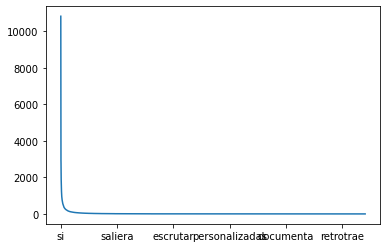

In [18]:
word_freqs.plot()

Porcentaje de tokens filtrados sobre el total al variar la frecuencia minima 

In [5]:
filtered_to_perc = lambda rf : 100 * len(rf[1]) / (len(rf[0]) + len(rf[1]))

filtered_words = [filter_words_by_freq(tokens_freq, i) for i in range(100)]

word_percents = map(filtered_to_perc, filtered_words)
word_percent_series = pd.Series(word_percents, name="Percent of words filtered by frequency")
word_percent_series.describe()

count    100.000000
mean      88.196909
std       15.633513
min        0.000000
25%       88.686719
50%       93.192966
75%       95.094401
max       96.155484
Name: Percent of words filtered by frequency, dtype: float64

<AxesSubplot:>

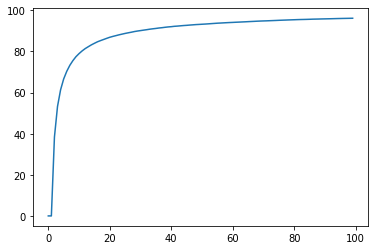

In [6]:
word_percent_series.plot()

In [7]:
filtered_files = map(lambda f_tokens: filter_files_by_words(file_texts, f_tokens[1]), filtered_words)

file_percents = map(filtered_to_perc, filtered_files)
file_percent_series = pd.Series(file_percents, name="Percent of files filtered by frequency")
file_percent_series.describe()

count    100.000000
mean      97.791713
std       14.071678
min        0.000000
25%       99.944009
50%       99.944009
75%       99.944009
max       99.944009
Name: Percent of files filtered by frequency, dtype: float64

<AxesSubplot:>

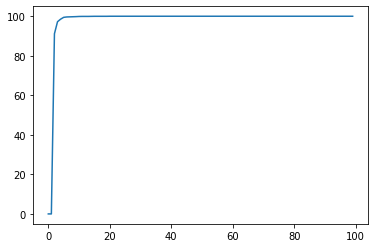

In [8]:
file_percent_series.plot()